## Apriori algorithm for the Bread Basket Dataset
this is is a kind of exercise for one of the most famous Data science algorithm, Apriori. Apriori tries to find relationships between items and frequent itemsets in a dataset. Now we want to jump into the code.

In [1]:
# install mlxtend to use special libraries for apriori 
# !pip install mlxtend
# I've already have it

In [2]:
# for calling dataset  
import pandas as pd

# for visualizing dataset
import matplotlib.pyplot as plt

# for generating FPs and association rules
from mlxtend.frequent_patterns import apriori, association_rules

In [3]:
# call the dataset and make a data frame
df = pd.read_csv("Datasets/bread_basket.csv")

In [4]:
# look at the dataset
df.head()

,Transaction,Item,date_time,period_day,weekday_weekend
0,1,Bread,30-10-2016 09:58,morning,weekend
1,2,Scandinavian,30-10-2016 10:05,morning,weekend
2,2,Scandinavian,30-10-2016 10:05,morning,weekend
3,3,Hot chocolate,30-10-2016 10:07,morning,weekend
4,3,Jam,30-10-2016 10:07,morning,weekend


In [5]:
# get some information about dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20507 entries, 0 to 20506
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Transaction      20507 non-null  int64 
 1   Item             20507 non-null  object
 2   date_time        20507 non-null  object
 3   period_day       20507 non-null  object
 4   weekday_weekend  20507 non-null  object
dtypes: int64(1), object(4)
memory usage: 801.2+ KB


In [6]:
# fortunately we don't have null values in dataset
df.isnull().sum()

Transaction        0
Item               0
date_time          0
period_day         0
weekday_weekend    0
dtype: int64

In [7]:
df.shape

(20507, 5)

In [8]:
# convert date_time column to pandas datetime ojbect
df['date_time'] = pd.to_datetime(df['date_time'])
# extract date and time
df['date'] = df['date_time'].dt.date
df['time'] = df['date_time'].dt.time
df['month'] = df['date_time'].dt.month
df.head(5)

,Transaction,Item,date_time,period_day,weekday_weekend,date,time,month
0,1,Bread,2016-10-30 09:58:00,morning,weekend,2016-10-30,09:58:00,10
1,2,Scandinavian,2016-10-30 10:05:00,morning,weekend,2016-10-30,10:05:00,10
2,2,Scandinavian,2016-10-30 10:05:00,morning,weekend,2016-10-30,10:05:00,10
3,3,Hot chocolate,2016-10-30 10:07:00,morning,weekend,2016-10-30,10:07:00,10
4,3,Jam,2016-10-30 10:07:00,morning,weekend,2016-10-30,10:07:00,10


In [9]:
# replacing with text in Month column
df['month'] = df['month'].replace([1,2,3,4,5,6,7,8,9,10,11,12],['January','February','March','April','May','June','July','August','September','October','November','December'])

In [10]:
# Extracting hour from date_time col
df['hour'] = df['date_time'].dt.hour
# df.rename(columns={"OldName":"NewName"})
df.rename(columns={"weekday_weekend":"day_type"},inplace= True)
df.head()

,Transaction,Item,date_time,period_day,day_type,date,time,month,hour
0,1,Bread,2016-10-30 09:58:00,morning,weekend,2016-10-30,09:58:00,October,9
1,2,Scandinavian,2016-10-30 10:05:00,morning,weekend,2016-10-30,10:05:00,October,10
2,2,Scandinavian,2016-10-30 10:05:00,morning,weekend,2016-10-30,10:05:00,October,10
3,3,Hot chocolate,2016-10-30 10:07:00,morning,weekend,2016-10-30,10:07:00,October,10
4,3,Jam,2016-10-30 10:07:00,morning,weekend,2016-10-30,10:07:00,October,10


In [11]:
Cookies_df = df[df['Item'] == 'Cookies']
Cookies_df

,Transaction,Item,date_time,period_day,day_type,date,time,month,hour
5,3,Cookies,2016-10-30 10:07:00,morning,weekend,2016-10-30,10:07:00,October,10
120,60,Cookies,2016-10-30 13:14:00,afternoon,weekend,2016-10-30,13:14:00,October,13
242,117,Cookies,2016-10-31 11:13:00,morning,weekday,2016-10-31,11:13:00,October,11
246,118,Cookies,2016-10-31 11:18:00,morning,weekday,2016-10-31,11:18:00,October,11
247,118,Cookies,2016-10-31 11:18:00,morning,weekday,2016-10-31,11:18:00,October,11
...,...,...,...,...,...,...,...,...,...
20166,9518,Cookies,2017-07-04 10:58:00,morning,weekday,2017-07-04,10:58:00,July,10
20215,9542,Cookies,2017-07-04 15:23:00,afternoon,weekday,2017-07-04,15:23:00,July,15
20282,9574,Cookies,2017-08-04 10:33:00,morning,weekend,2017-08-04,10:33:00,August,10
20319,9588,Cookies,2017-08-04 11:39:00,morning,weekend,2017-08-04,11:39:00,August,11


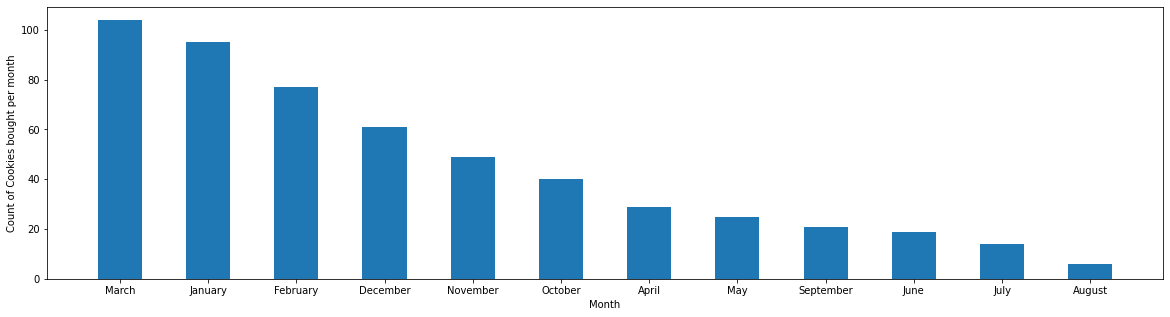

In [12]:
# plotting a special item bought per month
index = Cookies_df.month.value_counts().index
values = Cookies_df.month.value_counts().values
plt.figure(figsize=(20,5))
bar_width = 0.5
plt.bar(index, values, width=bar_width)
plt.xlabel('Month')
plt.ylabel('Count of Cookies bought per month')
plt.show()

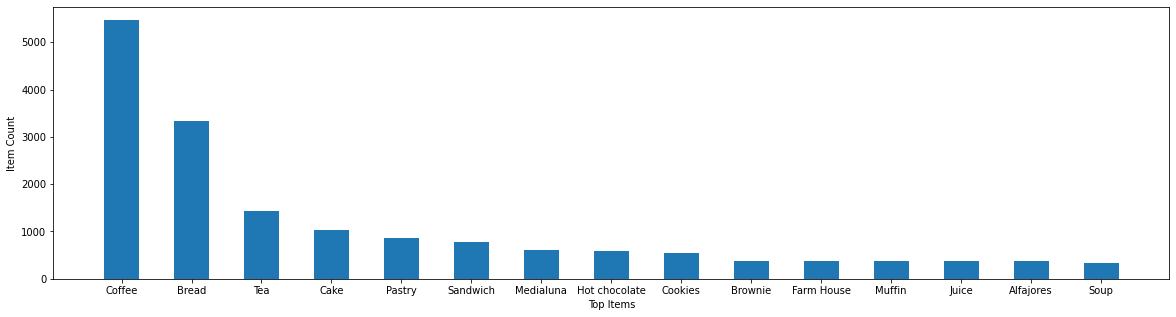

In [13]:
# plotting top 15 items with their count
index = df.Item.value_counts().head(15).index
values = df.Item.value_counts().head(15).values
plt.figure(figsize=(20,5))
bar_width = 0.5
plt.bar(index, values, width=bar_width)
plt.xlabel('Top Items')
plt.ylabel('Item Count')
plt.show()

In [14]:
df.Item.nunique() #Bread Basket is selling 94 Items

94

In [15]:
# df['Item'] = df['Item'].str.lower()
# df.drop('date_time',axis=1,inplace = True)
# df.head()

In [16]:
df_invoice_product = df.groupby(["Transaction", "Item"])["Item"].count().unstack().fillna(0).applymap(lambda x: 1 if  x>0 else 0)
df_invoice_product.shape

(9465, 94)

In [17]:
df_invoice_product.head()

Item,Adjustment,Afternoon with the baker,Alfajores,Argentina Night,Art Tray,Bacon,Baguette,Bakewell,Bare Popcorn,Basket,...,The BART,The Nomad,Tiffin,Toast,Truffles,Tshirt,Valentine's card,Vegan Feast,Vegan mincepie,Victorian Sponge
Transaction,,,,,,,,,,,,,,,,,,,,,
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [18]:
# Now use apriori with min support= 0.02 to find frequent itemsets
frequent_itemsets = apriori(df_invoice_product, min_support=0.02, use_colnames=True, low_memory=True)
frequent_itemsets.sort_values("support")

,support,itemsets
18,0.020285,(Truffles)
27,0.020602,"(Coffee, Juice)"
19,0.023349,"(Cake, Bread)"
32,0.023666,"(Coffee, Toast)"
24,0.023772,"(Tea, Cake)"
22,0.028104,"(Tea, Bread)"
25,0.028209,"(Coffee, Cookies)"
13,0.029054,(Scandinavian)
21,0.029160,"(Pastry, Bread)"
26,0.029583,"(Hot chocolate, Coffee)"


In [19]:
# association rules and the result
rules = association_rules(frequent_itemsets, metric="confidence", min_threshold=0.1)

In [20]:
rules[rules["lift"]>1].sort_values("support")

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
11,(Juice),(Coffee),0.038563,0.478394,0.020602,0.534247,1.116750,0.002154,1.119919
17,(Toast),(Coffee),0.033597,0.478394,0.023666,0.704403,1.472431,0.007593,1.764582
7,(Tea),(Cake),0.142631,0.103856,0.023772,0.166667,1.604781,0.008959,1.075372
8,(Cake),(Tea),0.103856,0.142631,0.023772,0.228891,1.604781,0.008959,1.111865
9,(Cookies),(Coffee),0.054411,0.478394,0.028209,0.518447,1.083723,0.002179,1.083174
3,(Pastry),(Bread),0.086107,0.327205,0.029160,0.338650,1.034977,0.000985,1.017305
10,(Hot chocolate),(Coffee),0.058320,0.478394,0.029583,0.507246,1.060311,0.001683,1.058553
12,(Medialuna),(Coffee),0.061807,0.478394,0.035182,0.569231,1.189878,0.005614,1.210871
14,(Sandwich),(Coffee),0.071844,0.478394,0.038246,0.532353,1.112792,0.003877,1.115384
13,(Pastry),(Coffee),0.086107,0.478394,0.047544,0.552147,1.154168,0.006351,1.164682
